In [1]:
import dgl
from dgl.data import DGLDataset
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import dgl.data
from dgl.nn import GraphConv,MaxPooling
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch.optim as optim
import numpy as np
import time
from dgl.dataloading import GraphDataLoader
from torch.utils.data.sampler import SubsetRandomSampler
import os
import yaml

#from torchviz import make_dot
from IPython.display import display
%matplotlib inline

Using backend: pytorch


In [5]:
data=np.load('save/ndata_8patch_gray.dgl/config3.yaml/model3/train_loss_list.npy')

10


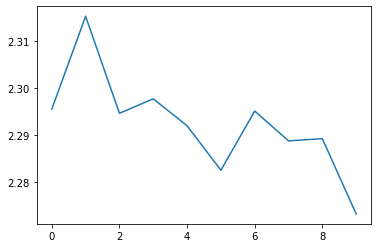

In [6]:
print(data.shape[0])
x=[i for i in range(data.shape[0])]
y=data
plt.plot(x,y)
plt.show()

In [8]:
root_path='save/ndata_8patch_gray_orig.dgl/config4.yaml/'
data_num=6
linear_on=False
#Test acc plot
for i in range(data_num):
    if linear_on:
        model_name=f'{root_path}model{i+1}_linear'
    else:
        model_name=f'{root_path}model{i+1}'
    data=np.load(f'{model_name}/test_acc_list.npy')
    x=[j for j in range(data.shape[0])]
    y=data

    fig=plt.figure()
    ax=fig.add_subplot()
    ax.plot(x,y)
    ax.set_title('Test accuracy')
    ax.set_xlabel('epochs')
    ax.set_ylabel('accuracy')
    ax.set_xlim(0,data.shape[0])
    ax.set_ylim(0,1)
    fig.savefig(f'{model_name}/test_acc.jpg',dpi=300)
    plt.close()

#Train acc plot
for i in range(data_num):
    if linear_on:
        model_name=f'{root_path}model{i+1}_linear'
    else:
        model_name=f'{root_path}model{i+1}'
    data=np.load(f'{model_name}/train_acc_list.npy')
    x=[j for j in range(data.shape[0])]
    y=data

    fig=plt.figure()
    ax=fig.add_subplot()
    ax.plot(x,y)
    ax.set_title('Train accuracy')
    ax.set_xlabel('epochs')
    ax.set_ylabel('accuracy')
    ax.set_xlim(0,data.shape[0])
    ax.set_ylim(0,1)
    fig.savefig(f'{model_name}/train_acc.jpg',dpi=300)
    plt.close()

#Train loss plot
for i in range(data_num):
    if linear_on:
        model_name=f'{root_path}model{i+1}_linear'
    else:
        model_name=f'{root_path}model{i+1}'
    data=np.load(f'{model_name}/train_loss_list.npy')
    x=[j for j in range(data.shape[0])]
    y=data

    fig=plt.figure()
    ax=fig.add_subplot()
    ax.plot(x,y)
    ax.set_title('Train loss')
    ax.set_xlabel('epochs')
    ax.set_ylabel('loss')
    ax.set_xlim(0,data.shape[0])
    fig.savefig(f'{model_name}/train_loss.jpg',dpi=300)
    plt.close()

#Train and Test acc plot
for i in range(data_num):
    if linear_on:
        model_name=f'{root_path}model{i+1}_linear'
    else:
        model_name=f'{root_path}model{i+1}'
    testdata=np.load(f'{model_name}/test_acc_list.npy')
    traindata=np.load(f'{model_name}/train_acc_list.npy')
    x=[j for j in range(data.shape[0])]

    fig=plt.figure()
    ax=fig.add_subplot()
    ax.plot(x,traindata,label='Train accuracy')
    ax.plot(x,testdata,label='Test accuracy')
    ax.legend()

    ax.set_title('Train & Test accuracy')
    ax.set_xlabel('epochs')
    ax.set_ylabel('accuracy')
    ax.set_xlim(0,data.shape[0])
    ax.set_ylim(0,1)
    fig.savefig(f'{model_name}/train_test_acc.jpg',dpi=300)
    plt.close()

In [5]:
root_path='save/ndata_8patch.dgl/config2.yaml/'
data_num=5
#Test acc plot
for i in range(data_num):
    data=np.load(f'{root_path}model{i+1}_linear/test_acc_list.npy')
    x=[j for j in range(data.shape[0])]
    y=data

    fig=plt.figure()
    ax=fig.add_subplot()
    ax.plot(x,y)
    ax.set_title('Test accuracy')
    ax.set_xlabel('epochs')
    ax.set_ylabel('accuracy')
    ax.set_xlim(0,data.shape[0])
    ax.set_ylim(0,1)
    fig.savefig(f'{root_path}model{i+1}_linear/test_acc.jpg',dpi=300)
    plt.close()

#Train acc plot
for i in range(data_num):
    data=np.load(f'{root_path}model{i+1}_linear/train_acc_list.npy')
    x=[j for j in range(data.shape[0])]
    y=data

    fig=plt.figure()
    ax=fig.add_subplot()
    ax.plot(x,y)
    ax.set_title('Train accuracy')
    ax.set_xlabel('epochs')
    ax.set_ylabel('accuracy')
    ax.set_xlim(0,data.shape[0])
    ax.set_ylim(0,1)
    fig.savefig(f'{root_path}model{i+1}_linear/train_acc.jpg',dpi=300)
    plt.close()

#Train loss plot
for i in range(data_num):
    data=np.load(f'{root_path}model{i+1}_linear/train_loss_list.npy')
    x=[j for j in range(data.shape[0])]
    y=data

    fig=plt.figure()
    ax=fig.add_subplot()
    ax.plot(x,y)
    ax.set_title('Train loss')
    ax.set_xlabel('epochs')
    ax.set_ylabel('loss')
    ax.set_xlim(0,data.shape[0])
    fig.savefig(f'{root_path}model{i+1}_linear/train_loss.jpg',dpi=300)
    plt.close()

#Train and Test acc plot
for i in range(data_num):
    testdata=np.load(f'{root_path}model{i+1}_linear/test_acc_list.npy')
    traindata=np.load(f'{root_path}model{i+1}_linear/train_acc_list.npy')
    x=[j for j in range(data.shape[0])]

    fig=plt.figure()
    ax=fig.add_subplot()
    ax.plot(x,traindata,label='Train accuracy')
    ax.plot(x,testdata,label='Test accuracy')
    ax.legend()

    ax.set_title('Train & Test accuracy')
    ax.set_xlabel('epochs')
    ax.set_ylabel('accuracy')
    ax.set_xlim(0,data.shape[0])
    ax.set_ylim(0,1)
    fig.savefig(f'{root_path}model{i+1}_linear/train_test_acc.jpg',dpi=300)
    plt.close()

In [2]:
root_path='save/ndata_8patch.dgl/config2.yaml/'
data_num=5
#Test acc plot
for i in range(data_num):
    data=np.load(f'{root_path}model{i+1}_linear_skip/test_acc_list.npy')
    x=[i for i in range(data.shape[0])]
    y=data

    fig=plt.figure()
    ax=fig.add_subplot()
    ax.plot(x,y)
    ax.set_title('Test acc')
    ax.set_xlabel('epochs')
    ax.set_ylabel('acc')
    ax.set_xlim(0,data.shape[0])
    ax.set_ylim(0,1)
    fig.savefig(f'{root_path}model{i+1}_linear_skip/test_acc.jpg',dpi=300)
    plt.close()

#Train acc plot
for i in range(data_num):
    data=np.load(f'{root_path}model{i+1}_linear_skip/train_acc_list.npy')
    x=[i for i in range(data.shape[0])]
    y=data

    fig=plt.figure()
    ax=fig.add_subplot()
    ax.plot(x,y)
    ax.set_title('Train acc')
    ax.set_xlabel('epochs')
    ax.set_ylabel('acc')
    ax.set_xlim(0,data.shape[0])
    ax.set_ylim(0,1)
    fig.savefig(f'{root_path}model{i+1}_linear_skip/train_acc.jpg',dpi=300)
    plt.close()

#Train loss plot
for i in range(data_num):
    data=np.load(f'{root_path}model{i+1}_linear_skip/train_loss_list.npy')
    x=[i for i in range(data.shape[0])]
    y=data

    fig=plt.figure()
    ax=fig.add_subplot()
    ax.plot(x,y)
    ax.set_title('Train loss')
    ax.set_xlabel('epochs')
    ax.set_ylabel('loss')
    ax.set_xlim(0,data.shape[0])
    fig.savefig(f'{root_path}model{i+1}_linear_skip/train_loss.jpg',dpi=300)
    plt.close()

#Train and Test acc plot
for i in range(data_num):
    testdata=np.load(f'{root_path}model{i+1}_linear_skip/test_acc_list.npy')
    traindata=np.load(f'{root_path}model{i+1}_linear_skip/train_acc_list.npy')
    x=[i for i in range(data.shape[0])]

    fig=plt.figure()
    ax=fig.add_subplot()
    ax.plot(x,traindata,label='Train acc')
    ax.plot(x,testdata,label='Test acc')
    ax.legend()

    ax.set_title('Test acc')
    ax.set_xlabel('epochs')
    ax.set_ylabel('acc')
    ax.set_xlim(0,data.shape[0])
    ax.set_ylim(0,1)
    fig.savefig(f'{root_path}model{i+1}_linear_skip/train_test_acc.jpg',dpi=300)
    plt.close()

In [3]:
#個別
root_path='save/ndata_8patch.dgl/config2.yaml/model1_linear'
#Test acc plot
data=np.load(f'{root_path}/test_acc_list.npy')
x=[j for j in range(data.shape[0])]
y=data

fig=plt.figure()
ax=fig.add_subplot()
ax.plot(x,y)
ax.set_title('Test accuracy')
ax.set_xlabel('epochs')
ax.set_ylabel('accuracy')
ax.set_xlim(0,data.shape[0])
ax.set_ylim(0,1)
fig.savefig(f'{root_path}/test_acc.jpg',dpi=300)
plt.close()

#Train acc plot

data=np.load(f'{root_path}/train_acc_list.npy')
x=[j for j in range(data.shape[0])]
y=data

fig=plt.figure()
ax=fig.add_subplot()
ax.plot(x,y)
ax.set_title('Train accuracy')
ax.set_xlabel('epochs')
ax.set_ylabel('accuracy')
ax.set_xlim(0,data.shape[0])
ax.set_ylim(0,1)
fig.savefig(f'{root_path}/train_acc.jpg',dpi=300)
plt.close()

#Train loss plot

data=np.load(f'{root_path}/train_loss_list.npy')
x=[j for j in range(data.shape[0])]
y=data

fig=plt.figure()
ax=fig.add_subplot()
ax.plot(x,y)
ax.set_title('Train loss')
ax.set_xlabel('epochs')
ax.set_ylabel('loss')
ax.set_xlim(0,data.shape[0])
fig.savefig(f'{root_path}/train_loss.jpg',dpi=300)
plt.close()

#Train and Test acc plot

testdata=np.load(f'{root_path}/test_acc_list.npy')
traindata=np.load(f'{root_path}/train_acc_list.npy')
x=[j for j in range(data.shape[0])]

fig=plt.figure()
ax=fig.add_subplot()
ax.plot(x,traindata,label='Train accuracy')
ax.plot(x,testdata,label='Test accuracy')
ax.legend()

ax.set_title('Train & Test accuracy')
ax.set_xlabel('epochs')
ax.set_ylabel('accuracy')
ax.set_xlim(0,data.shape[0])
ax.set_ylim(0,1)
fig.savefig(f'{root_path}/train_test_acc.jpg',dpi=300)
plt.close()

In [10]:
print(data)

[2.27968264 2.28800607 2.27155256 2.25937629 2.21684694 2.22458482
 2.22506595 2.22417283 2.23981071 2.24958634 2.21249199 2.16235232
 2.2047627  2.14239907 2.08294177]
